<a href="https://colab.research.google.com/github/amgothhrithik/Neutral-Network/blob/main/Digit_Classification_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import pandas as pd


# Load data
train_x = '/content/drive/My Drive/Data/digit/train_X.csv'
train_y = '/content/drive/My Drive/Data/digit/train_label.csv'

df1 = pd.read_csv(train_x).values.T  # Transpose directly
df2 = pd.read_csv(train_y).values.T

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
import numpy as np
import random

X =np.array(df1)
Y =np.array(df2)
print("shape of training set:X",X.shape)
print("shape of training set:Y",Y.shape)

m=np.random.permutation(X.shape[1])
X=X[:,m]
Y=Y[:,m]


shape of training set:X (784, 999)
shape of training set:Y (10, 999)


# Sample Input

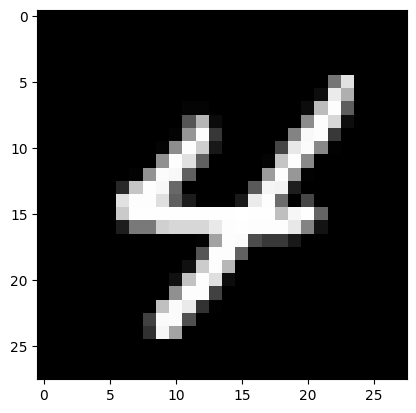

In [ ]:
plt.imshow(X[:, 5].reshape(28, 28), cmap = 'gray')
plt.show()

In [ ]:
import numpy as np
#activation
def sigmoid(z):
  return 1/(1+np.exp(-z))
def tanh(z):
  return np.tanh(z)
def smax(x):
    x_exp = np.exp(x - np.max(x, axis=0, keepdims=True))
    return x_exp / np.sum(x_exp, axis=0, keepdims=True)
def ds(z):
  return sigmoid(z)*(1-sigmoid(z))
def dt(z):
  return 1-np.power(tanh(z),2)



In [ ]:
#Forward Porpagation
def fp(X,w1,w2,b1,b2):
  z2=np.dot(w1,X)+b1
  a2=np.tanh(z2)
  z3=np.dot(w2,a2)+b2
  a3=smax(z3)
  return a3,z3,a2,z2



In [ ]:
#Cost Function
def L(a3,Y,m):
  return -np.sum(Y*np.log(a3))*(1/m)


In [ ]:
#Back propagation
def bp(a3,a2,Y,w2,z2,m):
  dz3=(a3-Y)*(1/m)
  dw2=np.dot(dz3,a2.T)
  db2=np.sum(dz3,axis=1, keepdims = True)
  #db2=db2.reshape(n3,1)
  dz2=np.dot(w2.T,dz3)*dt(z2)
  dw1=np.dot(dz2,X.T)
  db1=np.sum(dz2,axis=1, keepdims = True)
  #db1=db1.reshape(n2,1)
  return dw2,db2,dw1,db1



In [ ]:
#Initialzation
import random
n1 = X.shape[0]
n2 = 1000
n3 = Y.shape[0]
w1 = np.random.randn(n2, n1) * np.sqrt(1 / n1)  # Xavier initialization
w2 = np.random.randn(n3, n2) * np.sqrt(1 / n2)
b1=np.zeros((n2,1))
b2=np.zeros((n3,1))
m=X.shape[1]

In [ ]:
lr=0.02
c=[]
for i in range(150):
  a3,z3,a2,z2=fp(X,w1,w2,b1,b2)
  l=L(a3,Y,m)
  c.append(l)
  if i%10==0:
    print(l)
  dw2,db2,dw1,db1=bp(a3,a2,Y,w2,z2,m)

  w2=w2-lr*dw2
  b2=b2-lr*db2
  w1=w1-lr*dw1
  b1=b1-lr*db1

2.5235404006182454
0.6699187857433186
0.4135443571491381
0.3174589604644036
0.2646544026080715
0.22898496929367565
0.2023178858847776
0.1821270644324817
0.16599092674478616
0.15237300735391052
0.1409994003721126
0.1308022104341534
0.12216781367800157
0.11466237955159368
0.10814049845586987


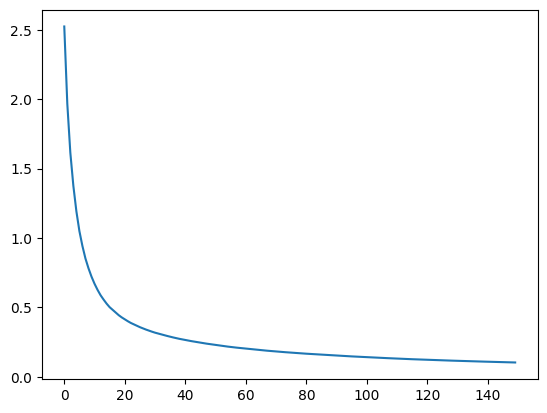

In [ ]:
import matplotlib.pyplot as plt
t = np.arange(0, 150)
plt.plot(t, c)
plt.show()

In [ ]:
# Load test data
test_x = '/content/drive/My Drive/Data/digit/test_X.csv'
test_y = '/content/drive/My Drive/Data/digit/test_label.csv'

X_test = pd.read_csv(test_x).values.T  # Transpose directly
Y_test= pd.read_csv(test_y).values.T

In [ ]:
a3,z3,a2,z2=fp(X_test,w1,w2,b1,b2)

In [ ]:
a_out = np.argmax(a3, 0)
label=np.argmax(Y_test,0)


In [ ]:
acc = np.mean(a_out == label)*100
print(acc)

83.3810888252149
